In [44]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [45]:
connection = psycopg2.connect(database="regressiondata", host="lapisco2.fortaleza.ifce.edu.br", port=3432, user="conceptu", password="conceptu@ifce")

In [46]:
cursor = connection.cursor()

In [47]:
cursor.execute("""SELECT vento  FROM regression;""")
fetch = cursor.fetchall()
list_regression_vento = [i[0] for i in cursor.description]

regression_table_vento = pd.DataFrame(fetch, columns= list_regression_vento)
display(regression_table_vento)

,vento
0,2.9
1,2.9
2,2.9
3,3.0
4,3.0
...,...
2234,14.0
2235,14.0
2236,14.1
2237,14.3


In [48]:
cursor.execute("""SELECT  pot  FROM regression;""")
fetch = cursor.fetchall()
list_regression_pot = [i[0] for i in cursor.description]

regression_table_pot = pd.DataFrame(fetch, columns= list_regression_pot)
display(regression_table_pot)

,pot
0,16.0
1,16.0
2,16.0
3,18.0
4,18.0
...,...
2234,508.0
2235,508.0
2236,508.0
2237,508.0


In [49]:
list_vent = []
for iterable_vent in regression_table_vento["vento"]:
    list_vent.append(iterable_vent)
print(list_vent)

[2.9, 2.9, 2.9, 3.0, 3.0, 3.2, 3.5, 3.5, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 4.0, 4.0, 4.1, 4.2, 4.3, 4.4, 4.4, 4.5, 4.5, 4.6, 4.9, 4.9, 5.0, 5.2, 5.3, 5.8, 5.9, 5.9, 6.1, 6.2, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,

In [50]:
list_pot = []
for iterable_pot in regression_table_pot["pot"]:
    list_pot.append(iterable_pot)
print(list_pot)

[16.0, 16.0, 16.0, 18.0, 18.0, 22.0, 25.0, 25.0, 23.0, 26.0, 33.0, 27.0, 29.0, 28.0, 28.0, 32.0, 31.0, 34.0, 30.0, 28.0, 28.0, 35.0, 35.0, 29.0, 40.0, 33.0, 38.0, 40.0, 38.0, 52.0, 46.0, 45.0, 46.0, 46.0, 56.0, 55.0, 59.0, 66.0, 81.0, 90.0, 101.0, 104.0, 118.0, 109.0, 113.0, 112.0, 165.0, 134.0, 124.0, 118.0, 127.0, 130.0, 119.0, 126.0, 125.0, 125.0, 132.0, 133.0, 171.0, 150.0, 137.0, 137.0, 136.0, 137.0, 135.0, 139.0, 168.0, 149.0, 154.0, 142.0, 152.0, 142.0, 143.0, 134.0, 140.0, 143.0, 140.0, 142.0, 162.0, 152.0, 145.0, 146.0, 150.0, 150.0, 146.0, 151.0, 162.0, 148.0, 153.0, 175.0, 167.0, 160.0, 160.0, 145.0, 145.0, 155.0, 156.0, 148.0, 155.0, 154.0, 156.0, 154.0, 159.0, 152.0, 170.0, 173.0, 172.0, 157.0, 167.0, 158.0, 159.0, 165.0, 170.0, 157.0, 153.0, 164.0, 149.0, 156.0, 163.0, 156.0, 161.0, 158.0, 185.0, 192.0, 172.0, 158.0, 161.0, 166.0, 158.0, 162.0, 156.0, 166.0, 159.0, 159.0, 177.0, 168.0, 164.0, 180.0, 171.0, 178.0, 188.0, 170.0, 174.0, 165.0, 184.0, 162.0, 169.0, 175.0, 171

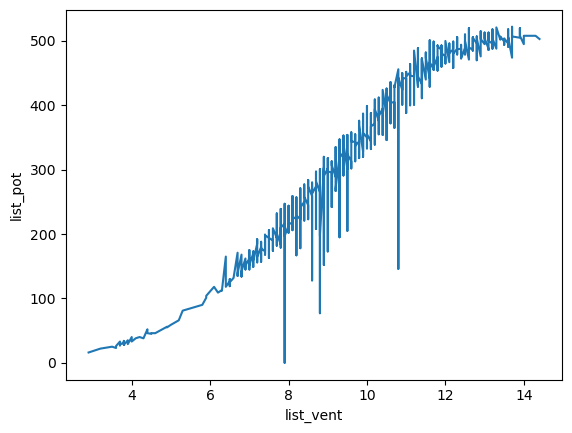

In [51]:
plt.plot(list_vent, list_pot)
plt.xlabel('list_vent')
plt.ylabel('list_pot')
plt.show()

In [52]:
slope, intercept, r, p, std_err = stats.linregress(list_vent, list_pot)

In [53]:
def myfunc(list_vent):
 return slope * list_vent + intercept

In [57]:
mymodel = list(map(myfunc, list_vent))

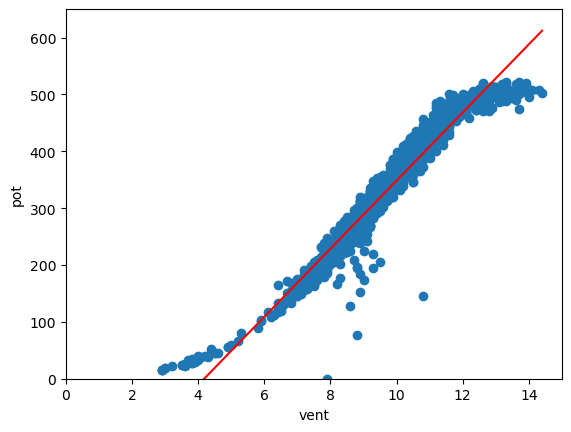

In [59]:
plt.scatter(list_vent, list_pot)
plt.plot(list_vent, mymodel, color= 'r')
plt.ylim(ymin=0, ymax=650)
plt.xlim(xmin=0, xmax=15)
plt.xlabel("vent")
plt.ylabel ("pot")
plt.show()